In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv("/content/drive/My Drive/servo.csv")

In [0]:
data.head()

,E,E.1,5,4,0.28125095
0,B,D,6,5,0.506252
1,D,D,4,3,0.356251
2,B,A,3,2,5.500033
3,D,B,6,5,0.356251
4,E,C,4,3,0.806255


In [0]:
data.columns

Index(['E', 'E.1', '5', '4', ' 0.28125095'], dtype='object')

In [0]:
headers = ['motor','screw','pgain','vgain','class']


In [0]:
data.columns = headers

In [0]:
data.head()

,motor,screw,pgain,vgain,class
0,B,D,6,5,0.506252
1,D,D,4,3,0.356251
2,B,A,3,2,5.500033
3,D,B,6,5,0.356251
4,E,C,4,3,0.806255


In [0]:
data.dtypes

motor     object
screw     object
pgain      int64
vgain      int64
class    float64
dtype: object

In [0]:
data.isnull().sum()

motor    0
screw    0
pgain    0
vgain    0
class    0
dtype: int64

In [0]:
data.describe()

,pgain,vgain,class
count,166.000000,166.00000,166.000000
mean,4.150602,2.53012,1.396386
std,1.018719,1.36925,1.561958
min,3.000000,1.00000,0.131250
25%,3.000000,1.00000,0.506252
50%,4.000000,2.00000,0.750004
75%,5.000000,4.00000,1.279683
max,6.000000,5.00000,7.100108


In [0]:
for col in data.columns:
  print(data[col].value_counts())

C    40
B    36
A    36
E    32
D    22
Name: motor, dtype: int64
A    42
B    35
C    31
D    30
E    28
Name: screw, dtype: int64
4    66
3    50
6    25
5    25
Name: pgain, dtype: int64
2    49
1    47
3    27
5    22
4    21
Name: vgain, dtype: int64
0.506252    14
0.543753    11
0.468752     9
0.581253     8
0.806255     7
0.356251     6
0.431252     6
4.499986     5
3.899964     5
0.243751     5
4.699995     4
1.499995     4
1.299997     4
0.393752     4
0.281251     4
1.031254     4
0.993756     4
0.731254     3
0.881255     3
0.900001     3
0.206250     3
1.106248     3
0.768754     3
0.843755     3
1.899990     3
4.099967     3
4.299977     3
1.068751     2
0.956256     2
0.700001     2
0.693754     2
0.318751     2
0.918755     2
5.100014     2
1.100000     2
5.300024     1
1.699992     1
3.699967     1
1.143746     1
2.499982     1
2.699979     1
6.900098     1
0.656254     1
5.700042     1
0.500000     1
1.181243     1
1.218740     1
5.500033     1
0.618753     1
0.131250 

In [0]:
 motor_encode = pd.get_dummies(data['motor'])

In [0]:
motor_encode.head()

,A,B,C,D,E
0,0,1,0,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,0,0,1


In [0]:
motor_encode.columns = ['motor_A','motor_B','motor_C','motor_D','motor_E']

In [0]:
data.drop(['motor'],axis=1,inplace=True)

In [0]:
data = pd.concat([data,motor_encode],axis=1)

In [0]:
data.head()

,pgain,vgain,class,motor_A,motor_B,motor_C,motor_D,motor_E
0,6,5,0.506252,0,1,0,0,0
1,4,3,0.356251,0,0,0,1,0
2,3,2,5.500033,0,1,0,0,0
3,6,5,0.356251,0,0,0,1,0
4,4,3,0.806255,0,0,0,0,1


In [0]:
screw_encode = pd.get_dummies(data['screw'])
screw_encode.columns = ['screw_A','screw_B','screw_C','screw_D','screw_E']
screw_encode.head()

,screw_A,screw_B,screw_C,screw_D,screw_E
0,0,0,0,1,0
1,0,0,0,1,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0


In [0]:
data.drop(['screw'],axis=1,inplace=True)

In [0]:
data = pd.concat([data,screw_encode],axis=1)

In [0]:
data.head()

,pgain,vgain,class,motor_A,motor_B,motor_C,motor_D,motor_E,screw_A,screw_B,screw_C,screw_D,screw_E
0,6,5,0.506252,0,1,0,0,0,0,0,0,1,0
1,4,3,0.356251,0,0,0,1,0,0,0,0,1,0
2,3,2,5.500033,0,1,0,0,0,1,0,0,0,0
3,6,5,0.356251,0,0,0,1,0,0,1,0,0,0
4,4,3,0.806255,0,0,0,0,1,0,0,1,0,0


In [0]:
data = data[['motor_A','motor_B','motor_C','motor_D','motor_E','screw_A','screw_B','screw_C','screw_D','screw_E','pgain','vgain','class']]

In [0]:
data.head()

,motor_A,motor_B,motor_C,motor_D,motor_E,screw_A,screw_B,screw_C,screw_D,screw_E,pgain,vgain,class
0,0,1,0,0,0,0,0,0,1,0,6,5,0.506252
1,0,0,0,1,0,0,0,0,1,0,4,3,0.356251
2,0,1,0,0,0,1,0,0,0,0,3,2,5.500033
3,0,0,0,1,0,0,1,0,0,0,6,5,0.356251
4,0,0,0,0,1,0,0,1,0,0,4,3,0.806255


In [0]:
corr = data.corr()

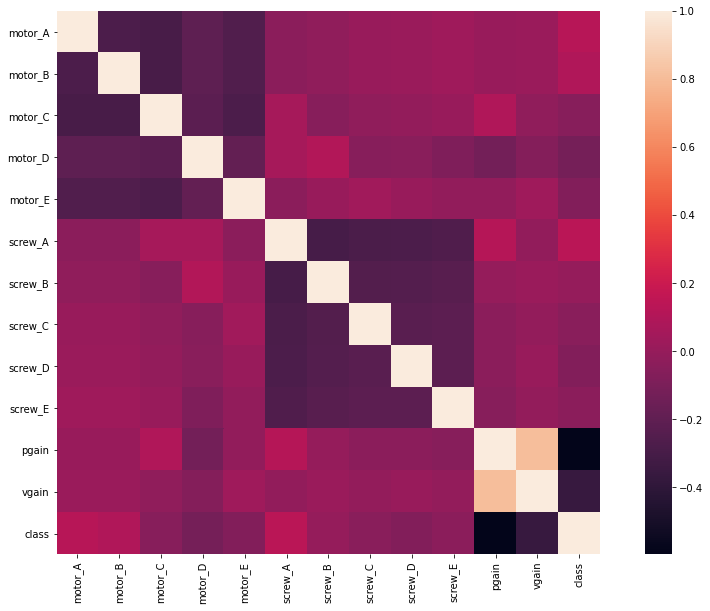

In [0]:
f, ax = plt.subplots(figsize=(16,10))
sns.heatmap(corr,square=True,ax = ax)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

In [0]:
x = data.drop(['class'],axis = 1)
y = data['class']

x_train,x_test,y_tmotor_A 	motor_B 	motor_C 	motor_D 	motor_E 	screw_A 	screw_B 	screw_C 	screw_D 	screw_E
0 	6 	5 	0.506252 	0 	1 	0 	0 	0 	0 	0 	0 	1 	rain,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.31431089621123254


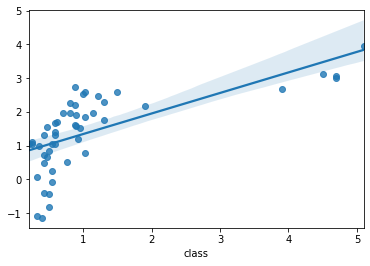

In [0]:
sns.regplot(x = y_test,y = y_test_pred)

In [0]:
X = data.drop(['class'],axis = 1)
Y = data['class']

cubic = PolynomialFeatures(degree=11)
x_cubic = cubic.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = lr.predict(X_train)
Y_test_pred = lr.predict(X_test)

print(plr.score(X_test,Y_test))

0.4162427878340388


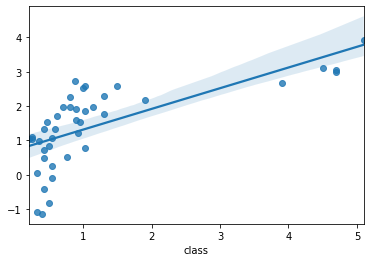